# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_data[combined_mouse_data.duplicated(['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_mouse_data.loc[combined_mouse_data['Mouse ID'] == "g989" , :]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_mouse_data.drop(duplicate_mouse_data.index)
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.

clean_data['Mouse ID'].nunique()


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen= clean_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = drug_regimen['Tumor Volume (mm3)'].mean()
median_tumor = drug_regimen['Tumor Volume (mm3)'].median()
var_tumor = drug_regimen['Tumor Volume (mm3)'].var()
sd_tumor = drug_regimen['Tumor Volume (mm3)'].std()
SEM_tumor = drug_regimen['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame()
summary_df['Tumour Volume (Mean)'] = drug_regimen['Tumor Volume (mm3)'].mean()
summary_df['Tumour Volume (Median)'] =  drug_regimen['Tumor Volume (mm3)'].median()     
summary_df['Tumour Volume (Variance)'] = drug_regimen['Tumor Volume (mm3)'].var ()         
summary_df['Tumour Volume (Std. Dev)'] = drug_regimen['Tumor Volume (mm3)']. std()
summary_df['Tumour Volume (SEM)'] = drug_regimen['Tumor Volume (mm3)'].sem()
summary_df


,Tumour Volume (Mean),Tumour Volume (Median),Tumour Volume (Variance),Tumour Volume (Std. Dev),Tumour Volume (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

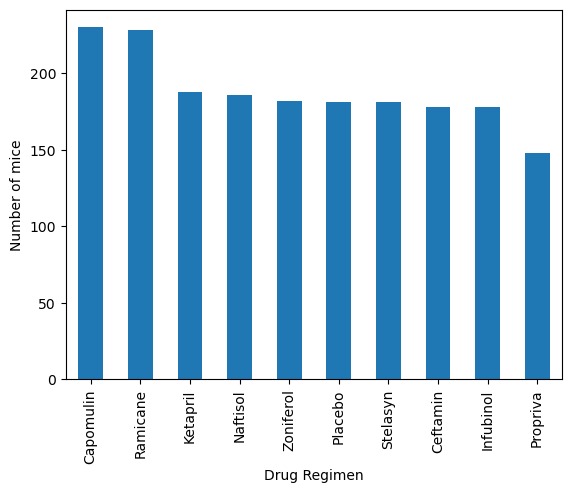

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_tested = drug_regimen['Mouse ID'].count().sort_values(ascending= False)
plot= timepoints_tested.plot(kind='bar')
plot.set_xlabel("Drug Regimen")
plot.set_ylabel('Number of mice')

plt.show()

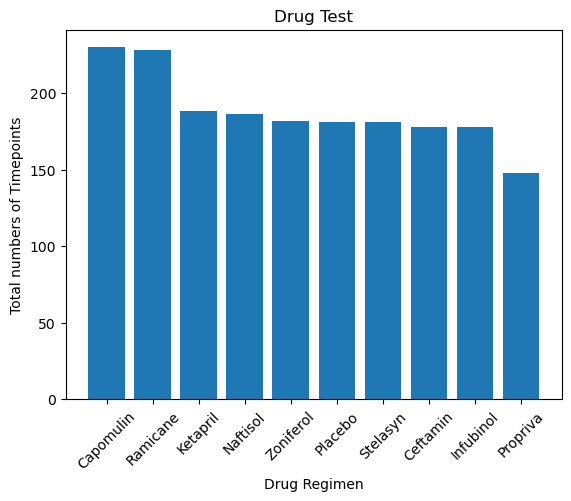

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=np.arange(len(timepoints_tested))
plt.bar(x_axis, timepoints_tested, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Total numbers of Timepoints")
plt.title("Drug Test")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol",
                            "Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"], rotation= 45,)

plt.show()

<AxesSubplot:ylabel='Mouse ID'>

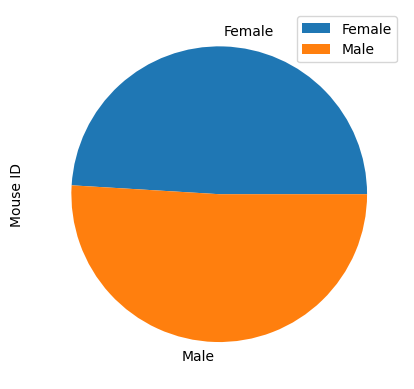

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = clean_data.groupby("Sex").count()
gender_df.plot.pie(y="Mouse ID")

Text(0.5, 1.0, 'Distribution of mice according to gender')

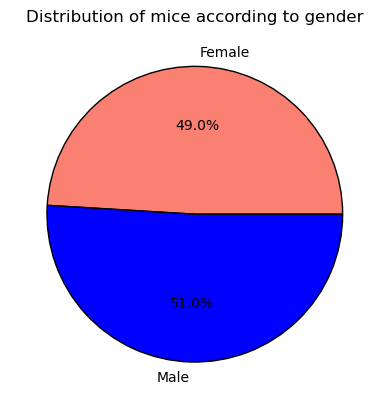

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colours= ("salmon","blue")
plt.pie(gender_df['Mouse ID'], labels=gender_df.index, autopct='%1.1f%%',
        colors=colours, wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title("Distribution of mice according to gender")

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grp_mouse_ID = clean_data.groupby([ "Mouse ID"])
max_TP = grp_mouse_ID["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(max_TP, clean_data, on= ["Mouse ID","Timepoint"],how = "right")
final_tumor_vol = final_tumor_vol.loc[(final_tumor_vol["Drug Regimen"] == "Capomulin")|
                                            (final_tumor_vol["Drug Regimen"] == "Ramicane")|
                                            (final_tumor_vol["Drug Regimen"] == "Infubinol")|
                                            (final_tumor_vol["Drug Regimen"] == "Ceftamin")]
final_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1855,z581,25,Infubinol,Female,24,25,54.316407,2
1856,z581,30,Infubinol,Female,24,25,56.286750,2
1857,z581,35,Infubinol,Female,24,25,58.628399,3
1858,z581,40,Infubinol,Female,24,25,60.053740,3


In [38]:



# Create empty list to fill with tumor vol data (for plotting)

ls_treat = ["Ceftamin", "Ramicane", "Infubinol", "Capomulin"]
Ceftamin_list =[]
Ramicane_list =[]
Infubinol_list =[]
Capomulin_list =[]
volume_list ={0: Ceftamin_list,
              1: Ramicane_list,
              2: Infubinol_list,
              3: Capomulin_list}


boxplot_dic = {}

# Put treatments into a list for for loop (and later for plot labels)

for drug in range (len(ls_treat)):
    volume_list[drug] = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == ls_treat[drug]] ["Tumor Volume (mm3)"]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = volume_list[drug].quantile([0.25, 0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
# Calculate upper and lower bounds
    upper = upperq + (1.5*iqr)
    lower = lowerq - (1.5*iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    ls_outlier = volume_list[drug].loc[(volume_list[drug]>upper) | (volume_list[drug]<lower)]

print (f"{ls_treat[drug]}'s potential outliers : {ls_outlier}")
    
    

Capomulin's potential outliers : 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

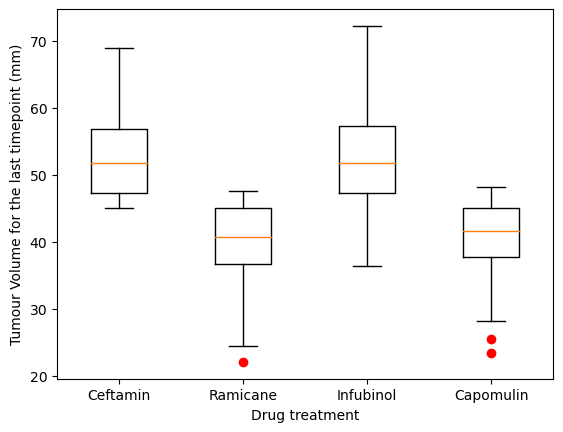

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Tumour Volume for the last timepoint (mm)")
plt.xlabel("Drug treatment")
data=[volume_list[0],volume_list[1], volume_list[2], volume_list[3]]
ax1.boxplot(data, 0 , 'ro', labels = ls_treat)
plt.show

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

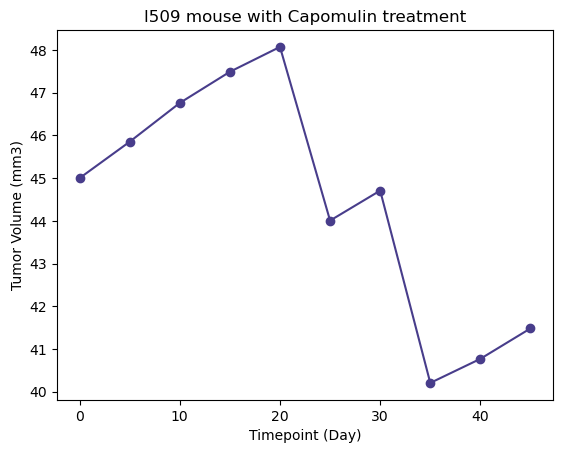

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509"), 
    ["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
plt.plot(Capomulin_df["Timepoint"], Capomulin_df["Tumor Volume (mm3)"], marker= "o", color= "darkslateblue")
plt.title("l509 mouse with Capomulin treatment")
plt.xlabel("Timepoint (Day)")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Weight VS Average Tumor volumne')

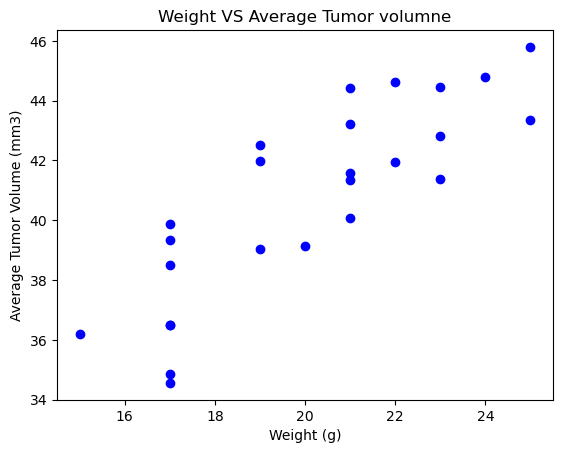

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avgtumour_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_weight_grp = avgtumour_df.groupby(["Weight (g)","Mouse ID"]).mean()
cap_weight_grp = cap_weight_grp.reset_index(drop= False)
plt.scatter(cap_weight_grp["Weight (g)"], cap_weight_grp["Tumor Volume (mm3)"], color= "blue", marker= "o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight VS Average Tumor volumne")

## Correlation and Regression

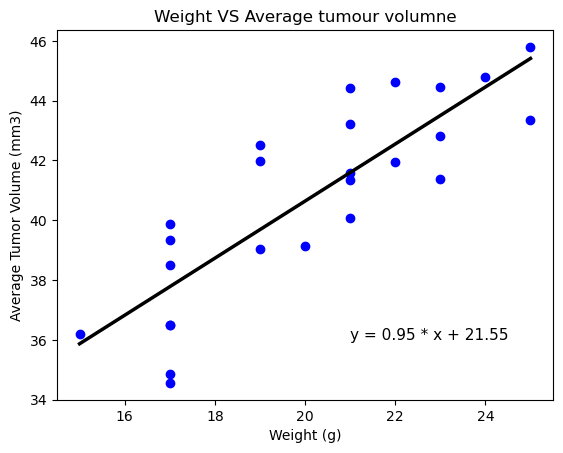

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = cap_weight_grp["Weight (g)"]
y = cap_weight_grp["Tumor Volume (mm3)"]

# calulate slope and constant
slope, constant= np.polyfit(x, y, deg = 1)

# create a line from x-axis 15 to 25 with 2 point
x_num = np.linspace(15, 25, num=2)

# Plot scatter plot
plt.scatter(x, y, color= "blue", marker= "o")
# Plot the regression line
plt.plot(x_num, constant + slope * x_num, color="black", linewidth= 2.5)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# state the linear regression equlation on the plot y = slope* x + constant
plt.text(21, 36, f"y = {slope:.2f} * x + {constant:.2f}", fontsize= 11)
plt.title("Weight VS Average tumour volumne")
plt.show()